In [1]:
import pandas as pd


In [2]:
# For some applications (like data visualization) we will want information to be verticalized, so we can filter on column values
# the typical example here is the calendar


data = pd.read_excel('Total_sales_month.xls')
data.head()
#We may want to filter by month, for example, or by quarter, or group by month, or sum all Januaries in a decade. All of these are easier to do if the months are in a column than accross multiple

,Product Name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Bush Somerset Collection Bookcase,1077,1110,1198,1143,1227,1128,1127,1095,1090,1129,1171,1291
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",1177,1098,1181,1207,1287,1206,1120,1108,1121,1217,1223,1280
2,Self-Adhesive Address Labels for Typewriters b...,802,734,678,726,782,697,681,583,643,657,729,869
3,Bretford CR4500 Series Slim Rectangular Table,983,1041,1122,1085,1028,979,959,886,945,989,989,1117
4,Eldon Fold 'N Roll Cart System,1136,1115,1087,1093,1142,1056,1002,902,988,1014,1048,1051


In [3]:
#pd.melt( data to melt, columns to keep)
verticalized = pd.melt(data,id_vars=['Product Name'])
verticalized = verticalized.rename(columns={'variable':'month','value':'Sales'})
display(verticalized.head())
display(verticalized.tail())

,Product Name,month,Sales
0,Bush Somerset Collection Bookcase,Jan,1077
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Jan,1177
2,Self-Adhesive Address Labels for Typewriters b...,Jan,802
3,Bretford CR4500 Series Slim Rectangular Table,Jan,983
4,Eldon Fold 'N Roll Cart System,Jan,1136


,Product Name,month,Sales
22087,RCA ViSYS 25425RE1 Corded phone,Dec,1105
22088,Cisco 8961 IP Phone Charcoal,Dec,1033
22089,"Eureka Hand Vacuum, Bagless",Dec,998
22090,LG G2,Dec,1471
22091,Eldon Jumbo ProFile Portable File Boxes Graphi...,Dec,831


In [4]:
verticalized.to_excel('verticalized_products.xls', index=False)

<ipython-input-4-441f8fce3d6e>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  verticalized.to_excel('verticalized_products.xls', index=False)


In [ ]:
# try to plot the evolution of customizable portfolios of stocks from the file 'stock_prices_1yr.xls' 

In [5]:
data = pd.read_excel('Stock_prices_1yr.xls')
data.head()

,Date,TSW,FGU,KTRF,KTF,LET,NWQ,OTP,CQR,OFT,PLM,JTF,XKS,OTF,MNT,PLT,NYA,LLC,MTO,PLR
0,2019-01-01,64.749100,71.833300,50.487000,55.609200,85.986700,43.588300,88.265200,71.523800,29.518900,60.958400,86.875900,70.981300,94.875600,72.453400,97.848700,36.735200,48.681200,26.945800,49.539200
1,2019-01-02,65.066371,71.143700,50.416318,55.503543,86.554212,43.583941,88.883056,71.881419,29.389017,60.745046,87.258154,71.584641,94.249421,73.119971,98.484717,37.095205,48.554629,26.951189,49.222149
2,2019-01-03,64.519813,71.527876,50.910398,55.042863,87.428410,43.182969,89.629674,71.615458,29.383139,61.273527,88.139461,71.384204,94.390795,73.163843,97.982444,37.288100,48.943066,26.905372,49.615926
3,2019-01-04,65.106943,71.821141,50.645664,54.712606,86.938811,43.200242,90.266045,71.672750,29.300866,61.120344,88.580159,72.005247,94.456869,72.629747,98.501751,37.631151,48.757082,26.967254,49.496848
4,2019-01-05,65.080901,71.713409,50.159466,55.205019,86.399790,42.962641,90.293125,71.794594,29.374118,60.796406,88.571301,71.515611,93.757888,72.615221,99.201114,37.992410,48.961862,27.212657,49.704735


In [6]:
import matplotlib.pyplot as plt

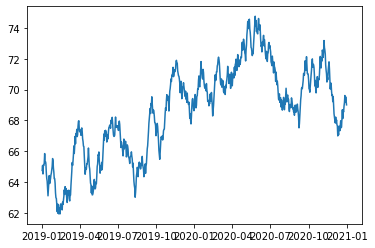

In [7]:
plt.plot(data['Date'],data['TSW'])

In [8]:
verticalized = pd.melt(data,id_vars=['Date'])
display(verticalized.head())
display(verticalized.tail())

,Date,variable,value
0,2019-01-01,TSW,64.749100
1,2019-01-02,TSW,65.066371
2,2019-01-03,TSW,64.519813
3,2019-01-04,TSW,65.106943
4,2019-01-05,TSW,65.080901


,Date,variable,value
13884,2020-12-27,PLR,64.248781
13885,2020-12-28,PLR,64.088159
13886,2020-12-29,PLR,64.049706
13887,2020-12-30,PLR,64.120161
13888,2020-12-31,PLR,64.729302


In [9]:
# Pivoting is the inverse of melting.
# When you melt you turn multiple column names into the values of a single column
# When you pivot you turn the values of a column into new column names
supertore_products = pd.read_excel('verticalized_products.xls')
supertore_products.head()

,Product Name,month,Sales
0,Bush Somerset Collection Bookcase,Jan,1077
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Jan,1177
2,Self-Adhesive Address Labels for Typewriters b...,Jan,802
3,Bretford CR4500 Series Slim Rectangular Table,Jan,983
4,Eldon Fold 'N Roll Cart System,Jan,1136


In [10]:
# The syntax is 
# in the index argument you put the columns you want to keep
# in the columns argument you put the columns whose values you want to make into columns
dataset=supertore_products.pivot(index='Product Name',columns='month').reset_index().head()
dataset.head()

Product Name Sales              \
month                                                      Apr   Aug   Dec   
0      "While you Were Out" Message Book, One Form pe...   976   939  1092   
1               #10 Gummed Flap White Envelopes, 100/Box  1121   922  1242   
2                          #10 Self-Seal White Envelopes  1632  1574  1656   
3             #10 White Business Envelopes,4 1/8 x 9 1/2  1132   959  1092   
4                #10- 4 1/8" x 9 1/2" Recycled Envelopes   806   628   859   

                                                             
month   Feb   Jan   Jul   Jun   Mar   May   Nov   Oct   Sep  
0       909   913   990  1015   916  1045  1055   971   951  
1      1167  1172  1016  1008  1074  1094  1111  1077  1000  
2      1477  1497  1641  1676  1535  1732  1654  1658  1649  
3      1244  1196  1008  1020  1186  1081  1014   959   954  
4       720   783   723   751   772   806   723   716   701

In [11]:
# using an aggregate column index:
dataset[('Sales','Apr')]

0     976
1    1121
2    1632
3    1132
4     806
Name: (Sales, Apr), dtype: int64

In [12]:
# you can have more than one remaining columns, but that will generate a multi-index
supertore_products['Sales (k)'] = supertore_products['Sales']/1000
supertore_products.head()

,Product Name,month,Sales,Sales (k)
0,Bush Somerset Collection Bookcase,Jan,1077,1.077
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Jan,1177,1.177
2,Self-Adhesive Address Labels for Typewriters b...,Jan,802,0.802
3,Bretford CR4500 Series Slim Rectangular Table,Jan,983,0.983
4,Eldon Fold 'N Roll Cart System,Jan,1136,1.136


In [13]:
supertore_products.pivot(index='Product Name',columns='month').reset_index().head()
# this multi index stuff looks complicated but really is not. The column names are now
# ('Sales','Jan')...('Sales','Dec'),('Sales (k)','Jan'),...,('Sales (k)','Dec')

Product Name Sales              \
month                                                      Apr   Aug   Dec   
0      "While you Were Out" Message Book, One Form pe...   976   939  1092   
1               #10 Gummed Flap White Envelopes, 100/Box  1121   922  1242   
2                          #10 Self-Seal White Envelopes  1632  1574  1656   
3             #10 White Business Envelopes,4 1/8 x 9 1/2  1132   959  1092   
4                #10- 4 1/8" x 9 1/2" Recycled Envelopes   806   628   859   

                                           ... Sales (k)                       \
month   Feb   Jan   Jul   Jun   Mar   May  ...       Dec    Feb    Jan    Jul   
0       909   913   990  1015   916  1045  ...     1.092  0.909  0.913  0.990   
1      1167  1172  1016  1008  1074  1094  ...     1.242  1.167  1.172  1.016   
2      1477  1497  1641  1676  1535  1732  ...     1.656  1.477  1.497  1.641   
3      1244  1196  1008  1020  1186  1081  ...     1.092  1.244  1.196  1.008   
4       720   783   723   751   772   806  ...     0.859  0.720  0.783  0.723   

                                                 
month    Jun    Mar    May    Nov    Oct    Sep  
0      1.015  0.916  1.045  1.055  0.971  0.951  
1      1.008  1.074  1.094  1.111  1.077  1.000  
2      1.676  1.535  1.732  1.654  1.658  1.649  
3      1.020  1.186  1.081  1.014  0.959  0.954  
4      0.751  0.772  0.806  0.723  0.716  0.701  

[5 rows x 25 columns]

In [ ]:
# However, most times you are not going to be pivoting tables that have been melted, 
# that is just too convenient
# For example, in the table above, what would happen if you had 2 lines with the same product and month, but different values?
# In other words, how does pivoting work in "regular" dataframes? 
# For those we have pivot_tables, who automatically do aggregations on your data

In [14]:
superstore = pd.read_excel('Sample - Superstore.xls')
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [15]:
# Let's make "Category" into an index, there are plenty of repetitions of those
superstore.pivot_table(index= ['Category'])
# we can see that:
# pandas did a group by Category
# it kept only the numeric columns
# he aggregated the results for those with the mean, which is his default aggregation

,Discount,Postal Code,Profit,Quantity,Row ID,Sales
Category,,,,,,
Furniture,0.173923,55726.556341,8.699327,3.785007,5041.643564,349.834887
Office Supplies,0.157285,54890.951211,20.327050,3.801195,4980.175075,119.324101
Technology,0.132323,55551.572279,78.752002,3.756903,5003.331890,452.709276


In [16]:
# we can also add an index to columns, like in standard pivot
superstore.pivot_table(index= ['Category'],columns=['Region'])

Discount                                 Postal Code  \
Region            Central      East     South      West       Central   
Category                                                                
Furniture        0.297380  0.154077  0.121536  0.131400  65486.453222   
Office Supplies  0.252743  0.142932  0.167437  0.093358  65275.734880   
Technology       0.133095  0.143364  0.107850  0.133890  65393.026190   

                                                              Profit  \
Region                   East         South          West    Central   
Category                                                               
Furniture        17317.247920  34552.117470  91680.442716  -5.968918   
Office Supplies  17401.548481  34243.389950  91769.716921   6.244712   
Technology       18640.338318  35261.351536  91543.449082  80.231981   

                            ...  Quantity                 Row ID               \
Region                East  ...     South      West      Central         East   
Category                    ...                                                 
Furniture         5.068496  ...  3.888554  3.813296  5198.831601  4976.960067   
Office Supplies  23.957114  ...  3.819095  3.813917  5025.764416  4926.139019   
Technology       88.714084  ...  3.815700  3.898164  4854.019048  4951.805607   

                                                Sales                          \
Region                 South         West     Central        East       South   
Category                                                                        
Furniture        5019.783133  4999.953324  340.534644  346.574383  353.309289   
Office Supplies  5105.296482  4929.139694  117.458801  120.044425  126.282727   
Technology       5006.679181  5152.409015  405.753124  495.278469  507.753952   

                             
Region                 West  
Category                     
Furniture        357.302325  
Office Supplies  116.422377  
Technology       420.687533  

[3 rows x 24 columns]

In [17]:
# Or we can do the same pivot all in the rows
superstore.pivot_table(index= ['Category','Region'])

Discount   Postal Code     Profit  Quantity  \
Category        Region                                                 
Furniture       Central  0.297380  65486.453222  -5.968918  3.798337   
                East     0.154077  17317.247920   5.068496  3.683860   
                South    0.121536  34552.117470  20.395199  3.888554   
                West     0.131400  91680.442716  16.272914  3.813296   
Office Supplies Central  0.252743  65275.734880   6.244712  3.803797   
                East     0.142932  17401.548481  23.957114  3.774533   
                South    0.167437  34243.389950  20.086827  3.819095   
                West     0.093358  91769.716921  27.733183  3.813917   
Technology      Central  0.133095  65393.026190  80.231981  3.676190   
                East     0.143364  18640.338318  88.714084  3.629907   
                South    0.107850  35261.351536  68.231506  3.815700   
                West     0.133890  91543.449082  73.962687  3.898164   

                              Row ID       Sales  
Category        Region                            
Furniture       Central  5198.831601  340.534644  
                East     4976.960067  346.574383  
                South    5019.783133  353.309289  
                West     4999.953324  357.302325  
Office Supplies Central  5025.764416  117.458801  
                East     4926.139019  120.044425  
                South    5105.296482  126.282727  
                West     4929.139694  116.422377  
Technology      Central  4854.019048  405.753124  
                East     4951.805607  495.278469  
                South    5006.679181  507.753952  
                West     5152.409015  420.687533

In [18]:
# tip: you can get rid of the multi-index with .reset_index()
superstore.pivot_table(index= ['Category','Region']).reset_index()

,Category,Region,Discount,Postal Code,Profit,Quantity,Row ID,Sales
0,Furniture,Central,0.297380,65486.453222,-5.968918,3.798337,5198.831601,340.534644
1,Furniture,East,0.154077,17317.247920,5.068496,3.683860,4976.960067,346.574383
2,Furniture,South,0.121536,34552.117470,20.395199,3.888554,5019.783133,353.309289
3,Furniture,West,0.131400,91680.442716,16.272914,3.813296,4999.953324,357.302325
4,Office Supplies,Central,0.252743,65275.734880,6.244712,3.803797,5025.764416,117.458801
5,Office Supplies,East,0.142932,17401.548481,23.957114,3.774533,4926.139019,120.044425
6,Office Supplies,South,0.167437,34243.389950,20.086827,3.819095,5105.296482,126.282727
7,Office Supplies,West,0.093358,91769.716921,27.733183,3.813917,4929.139694,116.422377
8,Technology,Central,0.133095,65393.026190,80.231981,3.676190,4854.019048,405.753124
9,Technology,East,0.143364,18640.338318,88.714084,3.629907,4951.805607,495.278469


In [19]:
#you can select only a subset of columns to keep the values of
superstore.pivot_table(index= ['Category','Region'], values = ['Sales','Profit'])

Profit       Sales
Category        Region                        
Furniture       Central  -5.968918  340.534644
                East      5.068496  346.574383
                South    20.395199  353.309289
                West     16.272914  357.302325
Office Supplies Central   6.244712  117.458801
                East     23.957114  120.044425
                South    20.086827  126.282727
                West     27.733183  116.422377
Technology      Central  80.231981  405.753124
                East     88.714084  495.278469
                South    68.231506  507.753952
                West     73.962687  420.687533

In [22]:
# and you can pick one or more aggregations
superstore.pivot_table(index= ['Category','Region'], values = ['Sales','Profit'], aggfunc = ['sum','mean'])
#superstore.pivot_table(index= ['Category','Region'], values = ['Sales','Profit'], aggfunc = {'Sales':'sum','Profit':'mean'})

sum                    mean            
                             Profit        Sales     Profit       Sales
Category        Region                                                 
Furniture       Central  -2871.0494  163797.1638  -5.968918  340.534644
                East      3046.1658  208291.2040   5.068496  346.574383
                South     6771.2061  117298.6840  20.395199  353.309289
                West     11504.9503  252612.7435  16.272914  357.302325
Office Supplies Central   8879.9799  167026.4150   6.244712  117.458801
                East     41014.5791  205516.0550  23.957114  120.044425
                South    19986.3928  125651.3130  20.086827  126.282727
                West     52609.8490  220853.2490  27.733183  116.422377
Technology      Central  33697.4320  170416.3120  80.231981  405.753124
                East     47462.0351  264973.9810  88.714084  495.278469
                South    19991.8314  148771.9080  68.231506  507.753952
                West     44303.6496  251991.8320  73.962687  420.687533

In [21]:
# finally, we have only been using numeric aggregations, therefore only numeric columns show up 
# but if you use aggregations that work on other datatypes, they are also output
superstore.pivot_table(index= ['Category','Region'], aggfunc = ['first','mean']).head(3)

first                                              \
                           City        Country Customer ID    Customer Name   
Category  Region                                                              
Furniture Central    Richardson  United States    GH-14485        Gene Hale   
          East     Philadelphia  United States    SF-20065  Sandra Flanagan   
          South       Henderson  United States    CG-12520      Claire Gute   

                                                                   \
                  Discount Order Date        Order ID Postal Code   
Category  Region                                                    
Furniture Central      0.6 2016-12-08  CA-2016-117590       75080   
          East         0.3 2017-07-16  US-2017-156909       19140   
          South        0.0 2016-11-08  CA-2016-152156       42420   

                                    \
                        Product ID   
Category  Region                     
Furniture Central  FUR-FU-10003664   
          East     FUR-CH-10002774   
          South    FUR-BO-10001798   

                                                                      ...  \
                                                        Product Name  ...   
Category  Region                                                      ...   
Furniture Central  Electrix Architect's Clamp-On Swing Arm Lamp, ...  ...   
          East                    Global Deluxe Stacking Chair, Gray  ...   
          South                    Bush Somerset Collection Bookcase  ...   

                                                                       \
                   Ship Date     Ship Mode         State Sub-Category   
Category  Region                                                        
Furniture Central 2016-12-10   First Class         Texas  Furnishings   
          East    2017-07-18  Second Class  Pennsylvania       Chairs   
          South   2016-11-11  Second Class      Kentucky    Bookcases   

                       mean                                                  \
                   Discount   Postal Code     Profit  Quantity       Row ID   
Category  Region                                                              
Furniture Central  0.297380  65486.453222  -5.968918  3.798337  5198.831601   
          East     0.154077  17317.247920   5.068496  3.683860  4976.960067   
          South    0.121536  34552.117470  20.395199  3.888554  5019.783133   

                               
                        Sales  
Category  Region               
Furniture Central  340.534644  
          East     346.574383  
          South    353.309289  

[3 rows x 25 columns]